## Regression.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
#  Import Data.
folder_name = 'case_study_datasets'
df = pd.read_csv(folder_name + '/cars_sampled.csv')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 00:00,20257,07/04/2016 04:44
1,07/03/2016 09:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,07/03/2016 00:00,88045,26/03/2016 13:17
2,01/04/2016 00:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 00:00,27449,01/04/2016 08:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 00:00,34537,07/04/2016 04:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 00:00,55270,01/04/2016 23:18


In [28]:
# set plot style
sns.set(
    rc={
        'figure.figsize': (11.7,8.27),
    }
)


In [29]:
cars = df.copy()

In [30]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [31]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [32]:
cars.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [33]:
# sumarrize the data
"""
This is done to convert all the values that contain "0e+04" to float.
"""
# display in float format.
pd.set_option(
    'display.float_format', lambda x: '%.3f' % x
)
cars.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.000,50001.000,50001.000,50001.000,50001.000,50001.000
mean,6559.865,2005.544,116.496,125613.688,5.744,50775.217
std,85818.470,122.992,230.568,40205.234,3.711,25743.702
min,0.000,1000.000,0.000,5000.000,0.000,1067.000
25%,1150.000,1999.000,69.000,125000.000,3.000,30559.000
50%,2950.000,2003.000,105.000,150000.000,6.000,49504.000
75%,7190.000,2008.000,150.000,150000.000,9.000,71404.000
max,12345678.000,9999.000,19312.000,150000.000,12.000,99998.000


In [34]:
print(df.count())
# limit to 500 rows
pd.set_option(
    "display.max_rows", 500
)

dateCrawled            50001
name                   50001
seller                 50001
offerType              50001
price                  50001
abtest                 50001
vehicleType            44813
yearOfRegistration     50001
gearbox                47177
powerPS                50001
model                  47243
kilometer              50001
monthOfRegistration    50001
fuelType               45498
brand                  50001
notRepairedDamage      40285
dateCreated            50001
postalCode             50001
lastSeen               50001
dtype: int64


In [35]:
"""
Dropping unwanted columns.
ie. name, dateCrawled, dateCreated, postalCode, lastSeen
"""
cars = cars.drop(
    columns=['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen'],
    
)

In [36]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               50001 non-null  object
 1   offerType            50001 non-null  object
 2   price                50001 non-null  int64 
 3   abtest               50001 non-null  object
 4   vehicleType          44813 non-null  object
 5   yearOfRegistration   50001 non-null  int64 
 6   gearbox              47177 non-null  object
 7   powerPS              50001 non-null  int64 
 8   model                47243 non-null  object
 9   kilometer            50001 non-null  int64 
 10  monthOfRegistration  50001 non-null  int64 
 11  fuelType             45498 non-null  object
 12  brand                50001 non-null  object
 13  notRepairedDamage    40285 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.3+ MB


In [37]:
# find the number of duplicate values in each column
cars.duplicated().sum()

470

In [38]:
# Check for duplicate records and keep the first occurence.
cars.drop_duplicates(
    keep='first',
    inplace=True
    )

In [39]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49531 entries, 0 to 50000
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   seller               49531 non-null  object
 1   offerType            49531 non-null  object
 2   price                49531 non-null  int64 
 3   abtest               49531 non-null  object
 4   vehicleType          44379 non-null  object
 5   yearOfRegistration   49531 non-null  int64 
 6   gearbox              46766 non-null  object
 7   powerPS              49531 non-null  int64 
 8   model                46801 non-null  object
 9   kilometer            49531 non-null  int64 
 10  monthOfRegistration  49531 non-null  int64 
 11  fuelType             45064 non-null  object
 12  brand                49531 non-null  object
 13  notRepairedDamage    39891 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.7+ MB


## Data Cleaning.

In [40]:
"""
Total number of rows 50001
Total number of duplicates 470
Removed unwanted columns like dateCrawled, dateCreated, postalCode, lastSeen

"""

'\nTotal number of rows 50001\nTotal number of duplicates 470\nRemoved unwanted columns like dateCrawled, dateCreated, postalCode, lastSeen\n\n'

In [41]:
# Check for missing values.
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [49]:
# unique values where the cols have null values.
print(f"fuelType:  {cars.fuelType.unique()}")
print(f"notRepairedDamage:  {cars.notRepairedDamage.unique()}")
print(f"gearbox:  {cars.gearbox.unique()}")
print(f"vehicleType:  {cars.vehicleType.unique()}")

fuelType:  ['diesel' 'petrol' nan 'cng' 'lpg' 'hybrid' 'electro' 'other']
notRepairedDamage:  [nan 'no' 'yes']
gearbox:  ['manual' 'automatic' nan]
vehicleType:  ['limousine' 'suv' 'bus' 'small car' 'station wagon' 'coupe' nan 'others'
 'cabrio']


In [72]:
# yearOfRegistration
print(f"yearOfRegistration:  {cars.yearOfRegistration.unique()}")

yearOfRegistration:  [2003 2005 2006 2008 1995 1996 1997 2001 2016 1999 1993 2002 1998 2017
 1992 1991 2000 2011 2004 2009 1979 2010 2007 1952 1972 1994 2013 2018
 2012 1989 2014 2015 1990 1988 1970 1961 1960 1966 2019 1983 1964 1971
 1975 1987 1980 1977 1976 1974 1978 1962 1938 1967 1986 1910 1985 1959
 1982 1981 1984 1950 1945 1965 1958 1973 1955 1956 1963 1933 1936 1928
 9999 1000 1968 1940 1969 1954 1957 1934 3500 1929 6000 7500 5000 8500
 2900 1943 1951 1500 3000 7800 2222 1941 3800 1947 1953 1255 8888]


In [69]:
"""Variable of yearOfRegistration has null values."""
yearwise_count = cars['yearOfRegistration'].value_counts().sort_index()

# count of yearOfRegistration
one = sum(
    cars['yearOfRegistration'] > 2022
)
    
two = sum(
    cars['yearOfRegistration'] < 1950
)
print(
    f"yearOfRegistration before 2022: {one}, after 1950: {two}"
)

yearOfRegistration before 2022: 24, after 1950: 38


<AxesSubplot:xlabel='yearOfRegistration', ylabel='price'>

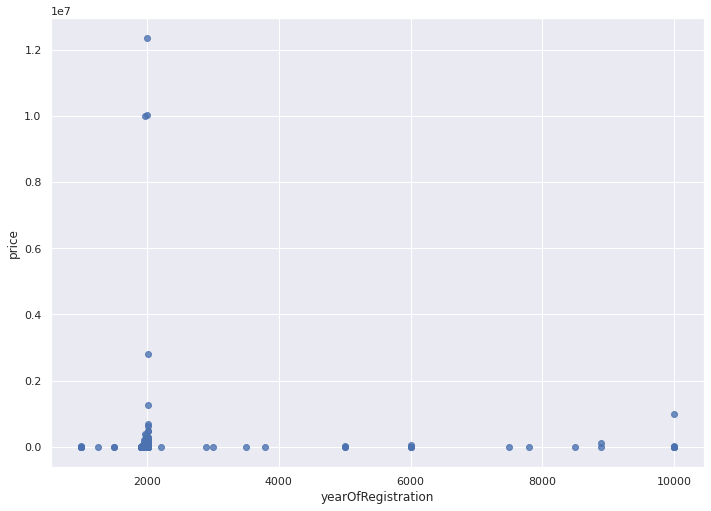

In [65]:
# plot year of registration and price.
sns.regplot(
    x='yearOfRegistration',
    y='price',
    scatter=True,
    fit_reg=False,
    data=cars
)

/home/novasangeeth/work/pytest-workouts/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='price'>

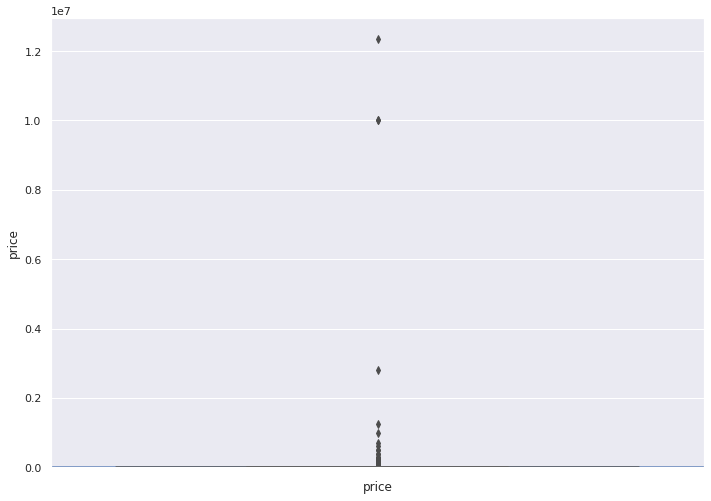

In [84]:
"""Plot Price."""
sns.distplot(
    cars['price'],
)
"""Box plot of price `"""
sns.boxplot(
    y='price',
    data=cars
)


In [86]:
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,49531.000,49531.000,49531.000,49531.000,49531.000
mean,6567.220,2005.560,116.501,125645.555,5.740
std,86222.378,123.572,231.536,40193.890,3.710
min,0.000,1000.000,0.000,5000.000,0.000
25%,1150.000,1999.000,69.000,125000.000,3.000
50%,2950.000,2003.000,105.000,150000.000,6.000
75%,7100.000,2008.000,150.000,150000.000,9.000
max,12345678.000,9999.000,19312.000,150000.000,12.000


In [80]:
"""Variable of price."""
price_count = cars['price'].value_counts().sort_index()
print(sum(cars['price'] > 1500000))
print(sum(cars['price'] < 100))

4
1748


In [89]:
"""Variable for Power values"""
power_count = cars['powerPS'].value_counts().sort_index()


/home/novasangeeth/work/pytest-workouts/env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='powerPS', ylabel='Density'>

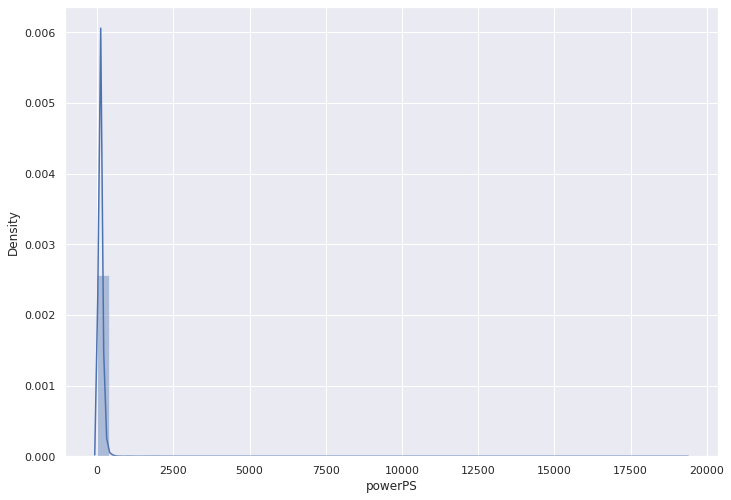

In [90]:
"""dist plot for power"""
sns.distplot(
    cars['powerPS'],
)

<AxesSubplot:ylabel='powerPS'>

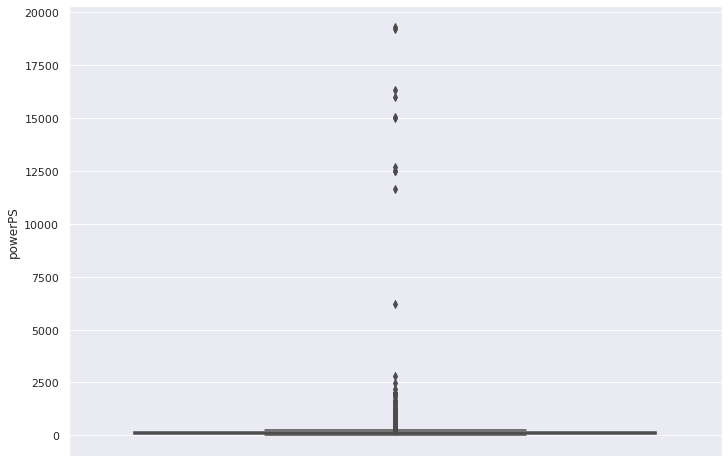

In [91]:
"""Box plot for power"""
sns.boxplot(
    y='powerPS',
    data=cars
)


<AxesSubplot:xlabel='powerPS', ylabel='price'>

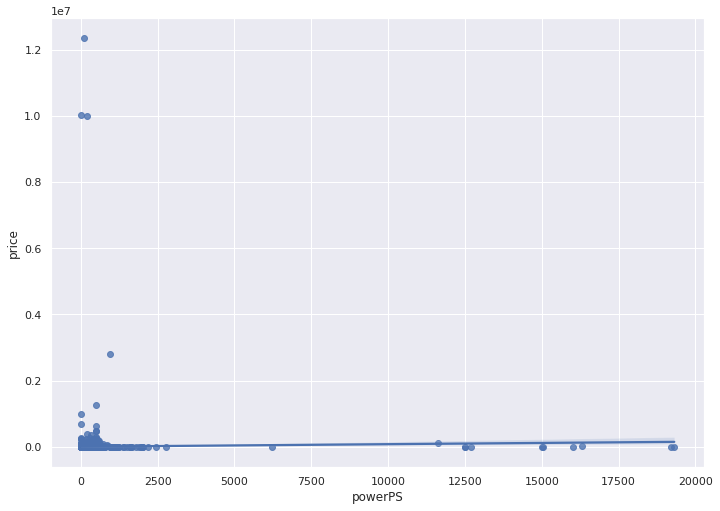

In [94]:
"""Scatter plot for power and price"""
sns.regplot(
    x='powerPS',
    y='price',
    scatter=True,
    data=cars
)

In [97]:
"""finding the sum of cars that have horse power greater than 50 and less than 700"""
print(sum(cars['powerPS'] > 50))
print(sum(cars['powerPS'] < 700))

42617
49476


In [101]:
"""finding the sum of cars that have horse power greater than 500 and less than 10"""
print(sum(cars['powerPS'] > 500))
print(sum(cars['powerPS'] < 10))

115
5565


In [ ]:
"""
WORKING RANGE:
    PRICE: 100 - 1500000
    POWER: 50 - 700
"""